   Humidity  Temperature  Heat Index  Atmospheric pressure  Altitude  Rain
0        77         29.9       36.55                101.04      0.42   0.0
1        79         29.5       35.92                101.06      0.00   0.0
2        80         29.4       35.88                101.07      0.00   0.0
3        79         29.2       35.07                101.08      0.17   0.0
4        80         29.1       35.02                101.13      0.00   0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Humidity              1379 non-null   int64  
 1   Temperature           1379 non-null   float64
 2   Heat Index            1379 non-null   float64
 3   Atmospheric pressure  1379 non-null   float64
 4   Altitude              1379 non-null   float64
 5   Rain                  1378 non-null   float64
dtypes: float64(5), int64(1)
memor

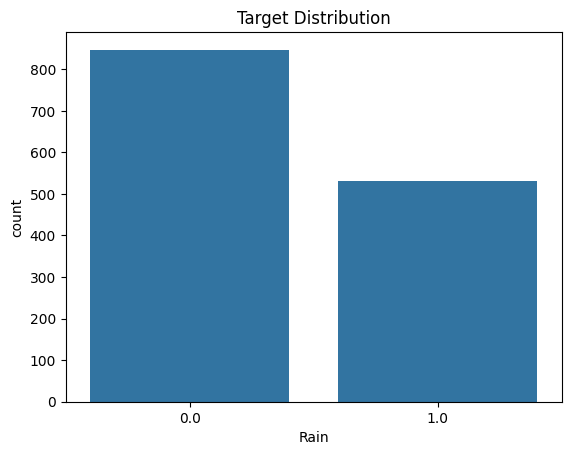


Model Performance:

+----+---------------------+--------------------+-------------------------+-------------------+
|    | Model               |   Accuracy (Train) |   Accuracy (Validation) |   Accuracy (Test) |
|----+---------------------+--------------------+-------------------------+-------------------|
|  0 | Logistic Regression |             0.8658 |                  0.8623 |            0.8587 |
|  1 | Random Forest       |             0.9976 |                  0.8623 |            0.8804 |
|  2 | Decision Tree       |             0.9976 |                  0.8188 |            0.7971 |
|  3 | K-Nearest Neighbors |             0.8984 |                  0.8768 |            0.8949 |
+----+---------------------+--------------------+-------------------------+-------------------+


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from tabulate import tabulate

# Load Data
data = pd.read_csv(r"C:\Users\vijap\Downloads\DS_LAB_ASSIGNMENT\DS_LAB_ASSIGNMENT\P20\RainPrediction - Sheet1.csv")


# Basic EDA
print(data.head())
print("\n")
print(data.info())
print("\n")
print(data.isnull().sum())
print("\n")
print(data.describe())
print("\n")

target_col = 'Rain'

# Visualize target distribution
sns.countplot(x=target_col, data=data)
plt.title('Target Distribution')
plt.show()

# Preprocessing
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Encode categorical features
le = LabelEncoder()
for col in data_imputed.columns:
    if data_imputed[col].dtype == 'object':
        data_imputed[col] = le.fit_transform(data_imputed[col])

X = data_imputed.drop(columns=[target_col])
y = data_imputed[target_col].astype(int)

# Train-Val-Test Split (60%-20%-20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42)

# Models to train
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    val_acc = accuracy_score(y_val, model.predict(X_val))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    results.append({
        'Model': name,
        'Accuracy (Train)': train_acc,
        'Accuracy (Validation)': val_acc,
        'Accuracy (Test)': test_acc
    })

results_df = pd.DataFrame(results)

print("\nModel Performance:\n")
print(tabulate(results_df, headers='keys', tablefmt='psql', floatfmt=".4f"))
